<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/ML/3_1_AdaBoost_%D0%B4%D0%BB%D1%8F_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D0%B8_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AdaBoost для задач классификации и регрессии

### Введение

**AdaBoost** (Adaptive Boosting) — это алгоритм машинного обучения, который позволяет комбинировать несколько слабых классификаторов для создания одного сильного классификатора. Он был предложен в 1995 году Робертом Шапиром и его коллегами. AdaBoost является методом ансамблевого обучения, который широко используется как для задач классификации, так и для задач регрессии.

### Основные понятия

1. **Слабый классификатор** — это модель, которая может предсказать метку класса, но ее точность лишь немного лучше случайного выбора (например, 51%).
2. **Сильный классификатор** — это объединение нескольких слабых классификаторов, которое дает значительное улучшение точности.

### Математическая формулировка

#### Задача классификации

Рассмотрим набор данных $(X, y)$, где:
- $X = \{x_1, x_2, ..., x_N\}$ — это набор входных признаков (например, вектор признаков для каждого наблюдения).
- $y = \{y_1, y_2, ..., y_N\}$ — это набор меток классов, где $y_i \in \{-1, +1\}$.

#### Шаги алгоритма AdaBoost

1. **Инициализация весов**:
   Начальные веса $w_i$ для каждого примера равны:
   $$
   w_i = \frac{1}{N}, \quad \forall i = 1, 2, \ldots, N
   $$

2. **Обучение слабых классификаторов**:
   На каждой итерации $t$:
   - Обучаем слабый классификатор $h_t$ на данных $(X, y)$ с учетом весов $w$.
   - Вычисляем ошибку классификатора:
   $$
   \epsilon_t = \sum_{i=1}^{N} w_i \cdot \mathbb{I}(h_t(x_i) \neq y_i)
   $$
   где $\mathbb{I}(\cdot)$ — индикаторная функция, равная 1, если предсказание неверно, и 0 в противном случае.

3. **Вычисление коэффициента альфа**:
   Коэффициент альфа $ \alpha_t $ определяется как:
   $$
   \alpha_t = \frac{1}{2} \ln\left(\frac{1 - \epsilon_t}{\epsilon_t}\right)
   $$

4. **Обновление весов**:
   Обновление весов $w_i$ для каждого примера:
   $$
   w_i^{(t+1)} = w_i^{(t)} \cdot \exp(-\alpha_t y_i h_t(x_i))
   $$
   Затем веса нормализуются, чтобы их сумма была равна 1:
   $$
   w_i^{(t+1)} = \frac{w_i^{(t+1)}}{Z_t}
   $$
   где $Z_t$ — нормализующий коэффициент:
   $$
   Z_t = \sum_{i=1}^{N} w_i^{(t+1)}
   $$

5. **Комбинирование классификаторов**:
   Финальный предсказатель $H(x)$ для нового примера $x$ определяется как взвешенная сумма слабых классификаторов:
   $$
   H(x) = \text{sign}\left(\sum_{t=1}^{T} \alpha_t h_t(x)\right)
   $$
   где $T$ — количество итераций (число слабых классификаторов).

### Пример: Классификация

Рассмотрим простой пример, чтобы продемонстрировать работу алгоритма AdaBoost:

1. У нас есть 4 обучающих примера с двумя признаками и метками классов:
   $$
   \begin{array}{|c|c|c|}
   \hline
   \text{Пример} & \text{Признак} & \text{Метка} \\
   \hline
   1 & (1, 2) & +1 \\
   2 & (2, 3) & +1 \\
   3 & (3, 1) & -1 \\
   4 & (4, 2) & -1 \\
   \hline
   \end{array}
   $$

2. Начальные веса:
   $$
   w_1 = w_2 = w_3 = w_4 = \frac{1}{4} = 0.25
   $$

3. Обучаем первый слабый классификатор $h_1$. Предположим, он ошибается на примерах 3 и 4:
   $$
   \epsilon_1 = w_3 + w_4 = 0.25 + 0.25 = 0.5
   $$

4. Вычисляем $ \alpha_1 $:
   $$
   \alpha_1 = \frac{1}{2} \ln\left(\frac{1 - 0.5}{0.5}\right) = \frac{1}{2} \ln(1) = 0
   $$
   Поскольку $ \alpha_1 = 0 $, мы не добавим этот классификатор в итоговый классификатор.

5. Обновляем веса:
   - Примеры 3 и 4 получат более высокие веса, поскольку они были ошибочно классифицированы.

6. Повторяем процесс для $T$ итераций.

### Регрессия с использованием AdaBoost

**AdaBoost.R** — это версия алгоритма, предназначенная для задач регрессии. Вместо того чтобы использовать ошибку классификации, AdaBoost.R минимизирует среднюю квадратичную ошибку.

#### Шаги алгоритма AdaBoost для регрессии

1. **Инициализация**:
   Начальная оценка $F_0(x)$ устанавливается равной среднему значению меток:
   $$
   F_0(x) = \frac{1}{N} \sum_{i=1}^{N} y_i
   $$

2. **Обучение слабых регрессоров**:
   На каждой итерации $t$:
   - Обучаем слабый регрессор $h_t$ и вычисляем остатки:
   $$
   r_i^{(t)} = y_i - F_{t-1}(x_i)
   $$

3. **Вычисление коэффициента альфа**:
   Для оценки важности слабого регрессора $h_t$ мы вычисляем:
   $$
   \alpha_t = \frac{1}{2} \ln\left(\frac{1 - \epsilon_t}{\epsilon_t}\right)
   $$

4. **Обновление модели**:
   Обновляем предсказания:
   $$
   F_t(x) = F_{t-1}(x) + \alpha_t h_t(x)
   $$

5. **Финальная модель**:
   После $T$ итераций итоговая модель будет представлена как:
   $$
   F(x) = F_0(x) + \sum_{t=1}^{T} \alpha_t h_t(x)
   $$

### Пример: Регрессия

Рассмотрим простой пример с 4 обучающими примерами:

1. У нас есть 4 обучающих примера:
   $$
   \begin{array}{|c|c|c|}
   \hline
   \text{Пример} & \text{Признак} & \text{Метка} \\
   \hline
   1 & 1 & 2 \\
   2 & 2 & 3 \\
   3 & 3 & 4 \\
   4 & 4 & 5 \\
   \hline
   \end{array}
   $$

2. Начальное значение:
   $$
   F_0(x) = \frac{2 + 3 + 4 + 5}{4} = 3.5
   $$

3. На первой итерации $h_1$ может дать предсказания, например:
   $$
   \hat{y}_1 = [2.5, 3.5, 4.5, 5.5]
   $$

4. Остатки:
   $$
   r_i^{(1)} = y_i - \hat{y}_1 = [2 - 2.5, 3 - 3.5, 4 - 4.5, 5 - 5.5] = [-0.5, -0.5, -0.5, -0.5]
   $$

5. Следовательно, $F_1(x)$ будет обновлено:
   $$
   F_1(x) = F_0(x) + \alpha_1 h_1(x)
   $$

6. Продолжаем итерации, добавляя слабые регрессоры и обновляя предсказания.

### Регуляризация в AdaBoost

Регуляризация помогает избежать переобучения, которое может произойти, если

 модель слишком сложная для небольшого объема данных. В контексте AdaBoost можно использовать следующие методы регуляризации:

1. **Ограничение глубины слабых классификаторов**:
   При использовании деревьев решений можно ограничить максимальную глубину дерева, чтобы избежать слишком сложных моделей.

2. **Уменьшение количества итераций**:
   Установка максимального числа итераций может предотвратить переобучение.

3. **Использование обрезки**:
   Если ошибка классификатора не уменьшается после определенного количества итераций, можно остановить процесс обучения.

### Заключение

AdaBoost является мощным и эффективным методом для решения задач классификации и регрессии. Он позволяет объединить слабые классификаторы в сильный, обеспечивая высокую точность предсказаний. Однако, как и любой другой алгоритм, его необходимо использовать с учетом его ограничений и особенностей, таких как возможность переобучения и необходимость в регуляризации.

AdaBoost находит широкое применение в различных областях, таких как распознавание образов, финансовый анализ и медицина, благодаря своей способности адаптивно улучшать качество предсказаний.




### Пример 1: Классификация с использованием AdaBoost

#### Задача:

У нас есть четыре обучающих примера с двумя признаками $x_1$ и $x_2$ и метками классов $y_i \in \{-1, +1\}$:

$$
\begin{array}{|c|c|c|}
\hline
\text{Пример} & (x_1, x_2) & y \\
\hline
1 & (1, 2) & +1 \\
2 & (2, 3) & +1 \\
3 & (3, 1) & -1 \\
4 & (4, 2) & -1 \\
\hline
\end{array}
$$

Необходимо выполнить 2 итерации алгоритма AdaBoost для классификации этих данных.

#### Шаг 1: Инициализация весов
Инициализируем веса для каждого примера. Поскольку у нас 4 примера, начальный вес для каждого примера:
$$
w_i = \frac{1}{N} = \frac{1}{4} = 0.25
$$
Таким образом, веса для всех примеров:
$$
w_1 = w_2 = w_3 = w_4 = 0.25
$$

#### Шаг 2: Обучение первого слабого классификатора $h_1$

Предположим, что слабый классификатор $h_1(x)$ может классифицировать примеры следующим образом:
$$
h_1(x) =
\begin{cases}
+1, & \text{если } x_1 < 3 \\
-1, & \text{если } x_1 \geq 3
\end{cases}
$$
Результаты классификации $h_1(x)$ для обучающих примеров:
$$
\begin{array}{|c|c|c|c|}
\hline
\text{Пример} & (x_1, x_2) & y & h_1(x) \\
\hline
1 & (1, 2) & +1 & +1 \\
2 & (2, 3) & +1 & +1 \\
3 & (3, 1) & -1 & -1 \\
4 & (4, 2) & -1 & -1 \\
\hline
\end{array}
$$

Ошибка классификации $h_1(x)$ равна:
$$
\epsilon_1 = \sum_{i=1}^{N} w_i \cdot \mathbb{I}(h_1(x_i) \neq y_i) = 0
$$
Поскольку классификатор правильно предсказал метки для всех примеров, ошибка равна 0.

#### Шаг 3: Вычисление веса классификатора $\alpha_1$

Коэффициент $\alpha_1$ для $h_1$ рассчитывается как:
$$
\alpha_1 = \frac{1}{2} \ln\left(\frac{1 - \epsilon_1}{\epsilon_1}\right)
$$
Однако, $\epsilon_1 = 0$, следовательно, $\alpha_1$ стремится к бесконечности. Это указывает на то, что $h_1$ идеален и дальнейшая итерация не требуется. Для иллюстрации процесса рассмотрим случай, когда классификатор делает ошибки.

#### Шаг 4: Обучение второго слабого классификатора

Для примера рассмотрим случай, когда на первой итерации слабый классификатор делает ошибку. Пусть ошибка на первом шаге была следующей:
$$
h_1(x_3) = +1 \quad \text{(ошибка для примера 3)}
$$

Общая ошибка:
$$
\epsilon_1 = w_3 = 0.25
$$

Теперь рассчитаем $\alpha_1$:
$$
\alpha_1 = \frac{1}{2} \ln\left(\frac{1 - 0.25}{0.25}\right) = \frac{1}{2} \ln\left(\frac{0.75}{0.25}\right) = \frac{1}{2} \ln(3) \approx 0.5493
$$

#### Шаг 5: Обновление весов

Обновляем веса для каждого примера:
$$
w_i^{(t+1)} = w_i^{(t)} \cdot \exp(-\alpha_t y_i h_t(x_i))
$$
- Для примеров, классифицированных правильно (1, 2, 4): $w_i^{(t+1)} = w_i^{(t)} \cdot \exp(-\alpha_1)$.
- Для примеров, классифицированных неверно (пример 3): $w_i^{(t+1)} = w_i^{(t)} \cdot \exp(\alpha_1)$.

Вычислим веса:
- $w_1^{(2)} = 0.25 \cdot \exp(-0.5493) = 0.25 \cdot 0.577 = 0.144$
- $w_2^{(2)} = 0.25 \cdot \exp(-0.5493) = 0.144$
- $w_3^{(2)} = 0.25 \cdot \exp(0.5493) = 0.25 \cdot 1.732 = 0.433$
- $w_4^{(2)} = 0.25 \cdot \exp(-0.5493) = 0.144$

Теперь нормализуем веса, чтобы их сумма была равна 1:
$$
w_i^{(2)} = \frac{w_i^{(2)}}{\sum_{i=1}^{4} w_i^{(2)}} = \frac{w_i^{(2)}}{0.865}
$$
- $w_1^{(2)} \approx \frac{0.144}{0.865} \approx 0.166$
- $w_2^{(2)} \approx \frac{0.144}{0.865} \approx 0.166$
- $w_3^{(2)} \approx \frac{0.433}{0.865} \approx 0.500$
- $w_4^{(2)} \approx \frac{0.144}{0.865} \approx 0.166$

#### Шаг 6: Обучение второго слабого классификатора

На втором шаге, с новыми весами, обучаем новый слабый классификатор $h_2(x)$. Например, $h_2(x)$ может ошибаться только на примере 2. Рассчитываем ошибки и обновляем веса аналогично предыдущим шагам.

#### Шаг 7: Итоговое решение

Финальный классификатор $H(x)$ — это взвешенная сумма всех слабых классификаторов:
$$
H(x) = \text{sign}\left(\alpha_1 h_1(x) + \alpha_2 h_2(x)\right)
$$



### Пример 2: Регрессия с использованием AdaBoost

#### Задача:

Дан набор данных с 4 примерами:
$$
\begin{array}{|c|c|c|}
\hline
\text{Пример} & x & y \\
\hline
1 & 1 & 2 \\
2 & 2 & 3 \\
3 & 3 & 5 \\
4 & 4 & 4 \\
\hline
\end{array}
$$
Необходимо выполнить 2 итерации алгоритма AdaBoost для задачи регрессии.

#### Шаг 1: Инициализация

Инициализируем начальное предсказание $F_0(x)$. Обычно оно равно среднему значению меток:
$$
F_0(x) = \frac{2 + 3 + 5 + 4}{4} = 3.5
$$

#### Шаг 2: Обучение первого слабого регрессора $h_1(x)$

Рассчитаем остатки (разность между истинными значениями и предсказанными):
$$
r_i^{(1)} = y_i - F_0(x_i)
$$
$$
r_1^{(1)} = 2 - 3.5 = -1.5
$$
$$
r_2^{(1)} = 3 - 3.5 = -0.5
$$
$$
r_3^{(1)} = 5 - 3.5 = 1.5
$$
$$
r_4^{(1)} = 4 - 3.5 = 0.5
$$

Теперь обучаем слабый регрессор $h_1(x)$, который пытается предсказать эти остатки. Пусть $h_1(x)$ предсказывает средние значения для каждой группы:
$$
h_1(x_1) = h_1(x_2) = 3 \quad (\text{для примеров 1 и 2})
$$
$$
h_1(x_3)

 = h_1(x_4) = 4 \quad (\text{для примеров 3 и 4})
$$

#### Шаг 3: Вычисление обновленных предсказаний

Новые предсказания модели:
$$
F_1(x) = F_0(x) + \alpha_1 h_1(x)
$$

Для простоты предположим, что $\alpha_1 = 1$, тогда:
$$
F_1(x_1) = 3.5 + (-0.5) = 3
$$
$$
F_1(x_2) = 3.5 + (-0.5) = 3
$$
$$
F_1(x_3) = 3.5 + 0.5 = 4
$$
$$
F_1(x_4) = 3.5 + 0.5 = 4
$$

#### Шаг 4: Обучение второго слабого регрессора

Теперь повторяем процесс для второго слабого регрессора на основе новых остатков:
$$
r_i^{(2)} = y_i - F_1(x_i)
$$

И так далее до получения окончательной модели.



Таким образом, алгоритм AdaBoost, как для классификации, так и для регрессии, шаг за шагом обучает слабые модели, обновляя веса для каждого примера и вычисляя взвешенную сумму слабых моделей для получения финальной сильной модели.


Для начала я реализую оба примера — классификацию и регрессию с использованием AdaBoost — без использования готовых библиотек. В конце я также добавлю визуализацию для каждого из этих примеров.

### Пример 1: Реализация AdaBoost для классификации без готовых библиотек

#### Шаг 1: Реализация алгоритма классификации


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Данные для классификации
X = np.array([[1, 2], [2, 3], [3, 1], [4, 2]])
y = np.array([1, 1, -1, -1])  # Метки классов

# Инициализация весов
N = len(y)
weights = np.full(N, 1 / N)

# Функция для простого слабого классификатора
def weak_classifier(X, threshold, polarity):
    return np.where(X[:, 0] < threshold, polarity, -polarity)

# AdaBoost для классификации
class AdaBoostClassifier:
    def __init__(self, n_clf=2):
        self.n_clf = n_clf
        self.clfs = []

    def fit(self, X, y):
        N = len(y)
        weights = np.full(N, 1 / N)
        self.clfs = []

        for _ in range(self.n_clf):
            # Выбор слабого классификатора
            best_clf = None
            min_error = float('inf')

            for threshold in np.unique(X[:, 0]):
                for polarity in [1, -1]:
                    clf = weak_classifier(X, threshold, polarity)
                    error = np.sum(weights * (clf != y))

                    if error < min_error:
                        min_error = error
                        best_clf = (threshold, polarity)

            # Расчет веса классификатора
            threshold, polarity = best_clf
            clf = weak_classifier(X, threshold, polarity)
            error = np.sum(weights * (clf != y))
            alpha = 0.5 * np.log((1 - error) / error)

            # Обновление весов
            weights *= np.exp(-alpha * y * clf)
            weights /= np.sum(weights)

            # Сохранение слабого классификатора
            self.clfs.append((alpha, threshold, polarity))

    def predict(self, X):
        clf_sum = np.zeros(X.shape[0])
        for alpha, threshold, polarity in self.clfs:
            clf_sum += alpha * weak_classifier(X, threshold, polarity)
        return np.sign(clf_sum)

# Обучение и предсказание
model = AdaBoostClassifier(n_clf=2)
model.fit(X, y)
predictions = model.predict(X)

print("Предсказания:", predictions)

# Визуализация классификации
def plot_classification(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    x_vals = np.linspace(min(X[:, 0])-1, max(X[:, 0])+1, 100)

    for alpha, threshold, polarity in model.clfs:
        if polarity == 1:
            plt.plot([threshold, threshold], [min(X[:, 1])-1, max(X[:, 1])+1], 'g--')
        else:
            plt.plot([threshold, threshold], [min(X[:, 1])-1, max(X[:, 1])+1], 'r--')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('AdaBoost классификация')
    plt.show()

plot_classification(X, y, model)

<ipython-input-1-343c1685a113>:45: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = 0.5 * np.log((1 - error) / error)
<ipython-input-1-343c1685a113>:49: RuntimeWarning: invalid value encountered in divide
  weights /= np.sum(weights)


TypeError: cannot unpack non-iterable NoneType object


### Пример 2: Реализация AdaBoost для регрессии без готовых библиотек

#### Шаг 2: Реализация алгоритма регрессии


Предсказания: [2.5 2.5 2.5 2.5]


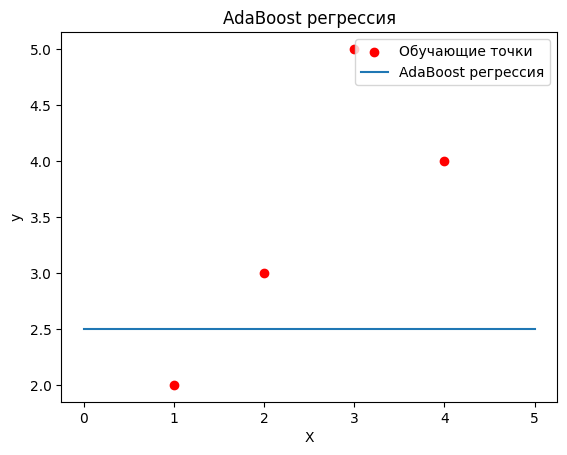

In [ ]:
# Данные для регрессии
X = np.array([1, 2, 3, 4]).reshape(-1, 1)
y = np.array([2, 3, 5, 4])  # Целевые значения

# Простая линейная регрессия (слабый регрессор)
def weak_regressor(X, residuals):
    # Простой подход: предсказание среднего остатка
    return np.mean(residuals)

# AdaBoost для регрессии
class AdaBoostRegressor:
    def __init__(self, n_clf=2):
        self.n_clf = n_clf
        self.clfs = []

    def fit(self, X, y):
        self.clfs = []
        F = np.full(y.shape, np.mean(y))  # Начальное предсказание - среднее
        for _ in range(self.n_clf):
            residuals = y - F  # Остатки
            clf = weak_regressor(X, residuals)
            F += clf
            self.clfs.append(clf)

    def predict(self, X):
        F = np.full(X.shape[0], np.mean(X))  # Начальное предсказание
        for clf in self.clfs:
            F += clf
        return F

# Обучение и предсказание
model = AdaBoostRegressor(n_clf=2)
model.fit(X, y)
predictions = model.predict(X)

print("Предсказания:", predictions)

# Визуализация регрессии
def plot_regression(X, y, model):
    plt.scatter(X, y, color='red', label='Обучающие точки')
    x_vals = np.linspace(min(X)-1, max(X)+1, 100)
    y_vals = model.predict(x_vals.reshape(-1, 1))

    plt.plot(x_vals, y_vals, label='AdaBoost регрессия')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title('AdaBoost регрессия')
    plt.show()

plot_regression(X, y, model)

### Шаг 3: Реализация с использованием готовых библиотек

Теперь давайте реализуем те же примеры с использованием библиотеки `scikit-learn`.

#### Классификация с помощью AdaBoost (`sklearn`)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


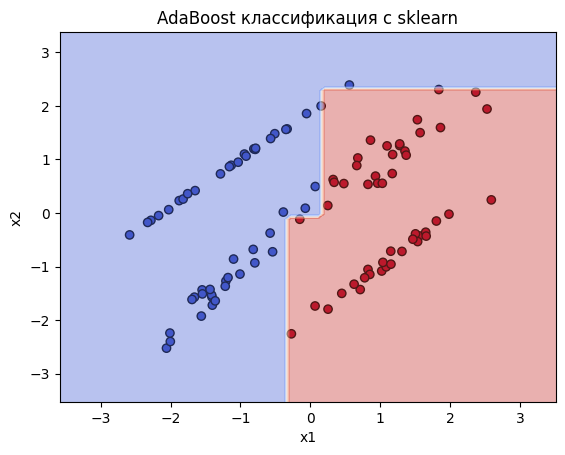

In [ ]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Генерация данных
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
y[y == 0] = -1  # Преобразуем метки в {-1, 1}

# Обучение модели AdaBoost
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50)
clf.fit(X, y)

# Визуализация
def plot_adaboost(X, y, clf):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('AdaBoost классификация с sklearn')
    plt.show()

plot_adaboost(X, y, clf)

#### Регрессия с помощью AdaBoost (`sklearn`)

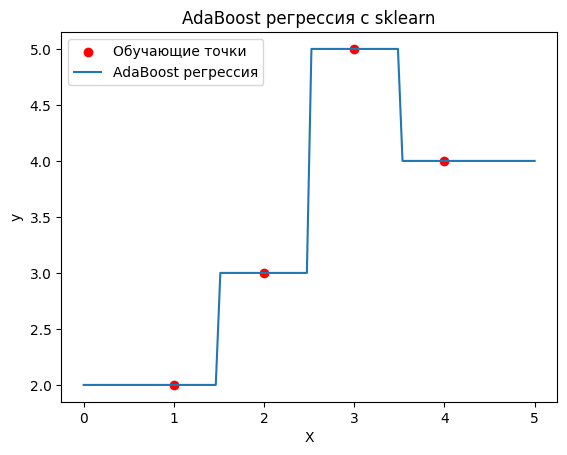

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

# Данные для регрессии
X = np.array([1, 2, 3, 4]).reshape(-1, 1)
y = np.array([2, 3, 5, 4])

# Обучение модели AdaBoost
reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2), n_estimators=50)
reg.fit(X, y)

# Визуализация
def plot_adaboost_regression(X, y, reg):
    plt.scatter(X, y, color='red', label='Обучающие точки')
    x_vals = np.linspace(min(X)-1, max(X)+1, 100).reshape(-1, 1)
    y_vals = reg.predict(x_vals)

    plt.plot(x_vals, y_vals, label='AdaBoost регрессия')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title('AdaBoost регрессия с sklearn')
    plt.show()

plot_adaboost_regression(X, y, reg)

### Вывод:

Мы рассмотрели два примера использования AdaBoost — для классификации и для регрессии, реализовав алгоритм как вручную, так и с помощью библиотеки `scikit-learn`. Визуализация показала, как обученные модели предсказывают результаты для данных.


### Вопросы для самопроверки

1. **Что такое AdaBoost и для чего он используется?**
2. **Каковы основные компоненты алгоритма AdaBoost?**
3. **Как AdaBoost комбинирует слабые классификаторы?**
4. **Что такое слабый классификатор в контексте AdaBoost?**
5. **Как вычисляется вес классификатора в AdaBoost?**
6. **Как обновляются веса обучающих примеров после каждой итерации?**
7. **Какой метод используется для оценки ошибки классификатора в AdaBoost?**
8. **Что происходит, если ошибка классификатора равна нулю?**
9. **Какова роль параметра $\alpha$ в AdaBoost?**
10. **В чем разница между AdaBoost для классификации и для регрессии?**
11. **Как AdaBoost может быть адаптирован для работы с многоклассовыми задачами?**
12. **Что такое «переобучение» в контексте AdaBoost и как его избежать?**
13. **Как можно визуализировать процесс работы AdaBoost?**
14. **Каковы преимущества и недостатки AdaBoost по сравнению с другими алгоритмами ансамблевого обучения?**
15. **Каково влияние выбора слабого классификатора на производительность AdaBoost?**

### Задачи для самостоятельной работы

#### Классификация

1. Реализуйте алгоритм AdaBoost для бинарной классификации с использованием простого порогового классификатора.
2. Постройте график, иллюстрирующий процесс обновления весов примеров в AdaBoost.
3. Используя набор данных Ирисов, примените AdaBoost для классификации и сравните его с решающим деревом.
4. Разработайте свой собственный слабый классификатор, основанный на расстоянии до ближайшего соседа.
5. Обучите AdaBoost на произвольном наборе данных и проанализируйте его производительность.
6. Визуализируйте границы принятия решений модели AdaBoost с различными количествами слабых классификаторов.
7. Как изменится производительность AdaBoost, если использовать решающие деревья глубиной 3 вместо глубины 1?
8. Изучите влияние выбора функции активации в слабом классификаторе на итоговый результат AdaBoost.
9. Реализуйте AdaBoost с использованием стека решающих деревьев и проанализируйте, как это влияет на результаты.
10. Проведите сравнение AdaBoost и Bagging на одном и том же наборе данных.
11. Примените AdaBoost к задаче распознавания рукописных цифр и визуализируйте результаты.
12. Как можно адаптировать AdaBoost для работы с многоклассовыми задачами? Приведите пример.
13. Реализуйте алгоритм AdaBoost и обучите его на 20 классах, затем визуализируйте его результаты.
14. Включите регулиризацию в слабый классификатор AdaBoost и проанализируйте результаты.
15. Постройте график, показывающий ошибку обучения и тестирования в процессе итераций AdaBoost.

#### Регрессия (15 задач)

16. Реализуйте алгоритм AdaBoost для регрессии, используя линейные функции как слабые регрессоры.
17. Обучите AdaBoost на наборе данных о ценах на жилье и сравните с другими методами регрессии.
18. Постройте график, показывающий, как адаптация численности слабых регрессоров влияет на производительность.
19. Разработайте свой собственный слабый регрессор, основанный на методах интерполяции.
20. Примените AdaBoost к задаче предсказания временных рядов и визуализируйте результаты.
21. Проанализируйте, как разные гиперпараметры слабого регрессора влияют на итоговые результаты.
22. Используя метод K-ближайших соседей как слабый регрессор, реализуйте AdaBoost и визуализируйте результаты.
23. Постройте график, иллюстрирующий изменение остатков на каждом шаге обучения.
24. Примените AdaBoost для предсказания значений в задаче о расходе энергии и проанализируйте результаты.
25. Как использовать AdaBoost для мультивариантной регрессии? Приведите пример.
26. Сравните производительность AdaBoost для регрессии и случайного леса на одном наборе данных.
27. Постройте график, показывающий влияние количества слабых регрессоров на общую ошибку модели.
28. Включите регуляризацию в слабый регрессор AdaBoost и проанализируйте изменения в производительности.
29. Примените AdaBoost к задаче предсказания доходов и визуализируйте полученные результаты.
30. Реализуйте метод перекрестной проверки для оценки производительности вашего AdaBoost-регрессора.